In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
from numpy.fft import fft, fftfreq, ifft, rfft

stopper_data = pd.read_csv('./data/train/Stopper/_80cm_AS_00008.csv', header=None)
stopper_data_2 = pd.read_csv('./data/train/Stopper/100cm_AS_00003.csv', header=None)
wall_data = pd.read_csv('./data/train/Wall_Collection/_80cm_AS_00002.csv', header=None)
wall_data_2 = pd.read_csv('./data/train/Wall_Collection/100cm_AS_00005.csv', header=None)

predict_stopper_data = pd.read_csv('./data/predict/Stopper/100cm_AS_00003.csv', header=None)
predict_wall_data = pd.read_csv('./data/predict/Wall_Collection/_80cm_AS_00002.csv', header=None)

In [251]:
def fft_from_data_frame(data_frame):
    fs= 1e6
    signal_set = []
    for index, row in data_frame.iterrows():
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_set.append(np.abs(cut_high_signal))
    return signal_set

In [245]:
stopper_fft = fft_from_data_frame(stopper_data) + fft_from_data_frame(stopper_data_2)
wall_fft = fft_from_data_frame(wall_data)+ fft_from_data_frame(wall_data_2)
predict_stopper_fft = fft_from_data_frame(predict_stopper_data)
predict_wall_fft = fft_from_data_frame(predict_wall_data)
X = stopper_fft + wall_fft
y = [0]*len(stopper_fft) + [1]*len(wall_fft)
predict_X = predict_stopper_fft + predict_wall_fft
y_true = [0]*len(predict_stopper_fft) + [1]*len(predict_wall_fft)

In [273]:
#all files
stopper_data = pd.read_csv('./data/all/Stopper_train_80_to_180.csv', header=None)
wall_data = pd.read_csv('./data/all/Wall_Collection_train_80_to_180.csv', header=None)
predict_stopper_data = pd.read_csv('./data/all/Stopper_predict_80_to_180.csv', header=None)
predict_wall_data = pd.read_csv('./data/all/Wall_Collection_predict_80_to_180.csv', header=None)

#get fft
stopper_fft = fft_from_data_frame(stopper_data)
wall_fft = fft_from_data_frame(wall_data)
X = stopper_fft + wall_fft
y = [0]*len(stopper_fft) + [1]*len(wall_fft)

#predictions
predict_stopper_fft = fft_from_data_frame(predict_stopper_data)
predict_wall_fft = fft_from_data_frame(predict_wall_data)
predict_X = predict_stopper_fft + predict_wall_fft
y_true = [0]*len(predict_stopper_fft) + [1]*len(predict_wall_fft)

In [275]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(2,), random_state=1)
clf.fit(X, y)
result = clf.predict(predict_X)
print(result)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0]


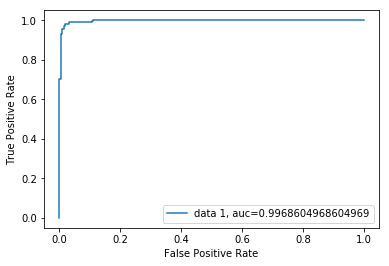

In [276]:
from sklearn import metrics
pred = clf.predict_proba(predict_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_true, pred)
auc = metrics.roc_auc_score(y_true, pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[[192   6]
 [  2 220]]


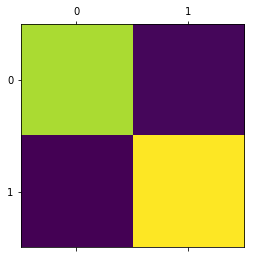

In [277]:
y_pred = clf.predict(predict_X)

# confusion metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.matshow(cm)
print(cm)

In [280]:
for i in range(1,10):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(i,), random_state=1)
    clf.fit(X, y)
    result = clf.predict(predict_X)
    print(result, i)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0] 1 8
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
1.0 1
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.9090909090909091 2
0.90